In [1]:
#cross-correlazione tra finestra con zero-padding e segnale 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
from numpy.fft import rfft, irfft

arrwnd=np.loadtxt("FinestreRef.npy")

def calcoloCCR(data, arrwnd):

#le due liste da confrontare devono avere stessa lunghezza

    for i in range (len(arrwnd)):
   
        template=arrwnd[i].tolist()
    
    #Zero padding
        for i in range (10,len(data)):
            template.append(0)

    # Fast Fourier Transform (FFT)
        Data= rfft(data)
   
    # Inverto il vettore template
        tempY = []
        while len(template) > 0:
            tempY.append(template.pop())
    
        Y = rfft(tempY)

    # Faccio la formula inversa della FFT
    
        colpoDiSonno = False
        
        CrossCorrelazione = irfft(Data*Y)
        if(max(CrossCorrelazione)>4):
            colpoDiSonno = True
            print("Avvenuto colpo di sonno")
            x=np.arange(0,len(data))
            plt.plot(x,CrossCorrelazione)
            plt.xlabel("Campioni")
            plt.ylabel("CrossCorrelazione")
            line1=plt.plot(x,[4]*(len(data)),'r')
            plt.show()
    return colpoDiSonno

Avvenuto colpo di sonno


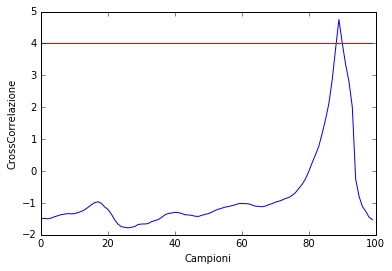

Avvenuto colpo di sonno


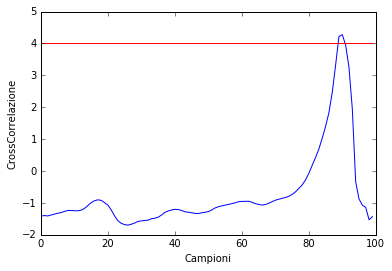

Avvenuto colpo di sonno


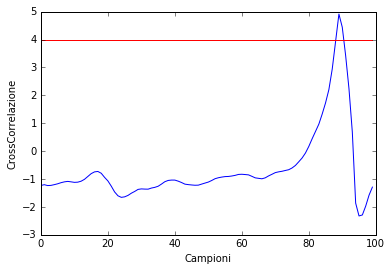

Avvenuto colpo di sonno


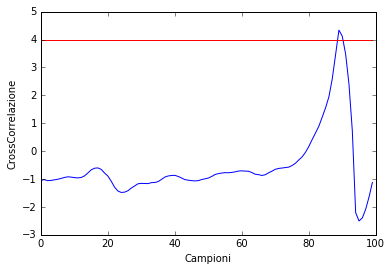

Avvenuto colpo di sonno


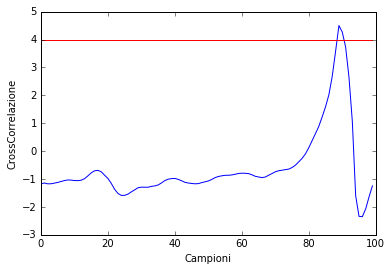

Avvenuto colpo di sonno


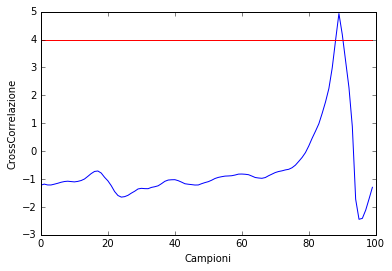

Avvenuto colpo di sonno
[-0.13, -0.23, -0.3, -0.33, -0.32, -0.28, -0.27, -0.25, -0.28, -0.27, -0.26, -0.26, -0.26, -0.26, -0.24, -0.23, -0.22, -0.23, -0.25, -0.26, -0.25, -0.2, -0.18, -0.17, -0.16, -0.18, -0.15, -0.17, -0.23, -0.28, -0.31, -0.33, -0.35, -0.34, -0.33, -0.3, -0.3, -0.3, -0.3, -0.28, -0.29, -0.3, -0.29, -0.26, -0.25, -0.24, -0.22, -0.22, -0.22, -0.24, -0.24, -0.25, -0.26, -0.26, -0.25, -0.25, -0.26, -0.26, -0.23, -0.22, -0.21, -0.2, -0.21, -0.2, -0.2, -0.19, -0.18, -0.19, -0.17, -0.17, -0.19, -0.18, -0.21, -0.22, -0.21, -0.21, -0.18, -0.17, -0.16, -0.16, -0.17, -0.16, -0.15, -0.12, -0.12, -0.1, -0.07, -0.03, 0.02, 0.06, 0.14, 0.2, 0.22, 0.29, 0.42, 0.54, 0.72, 0.99, 1.27, 1.39]
[-0.18, -0.18, -0.14, -0.15, -0.18, -0.21, -0.22, -0.17, -0.13, -0.14, -0.16, -0.17, -0.1, -0.13, -0.23, -0.3, -0.33, -0.32, -0.28, -0.27, -0.25, -0.28, -0.27, -0.26, -0.26, -0.26, -0.26, -0.24, -0.23, -0.22, -0.23, -0.25, -0.26, -0.25, -0.2, -0.18, -0.17, -0.16, -0.18, -0.15, -0.17, -0.23, -0.28, 

In [3]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import numpy as np
import scipy.signal as signal
import time
import matplotlib.pyplot as plt

def pitchcalc(accX, accY, accZ):
    argomento=accY/np.sqrt(accX*accX*accZ*accZ)
    pitch=np.arctan(argomento)
    return pitch


# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(1,4)

#empty lists creation
accX=list()
accY=list()
accZ=list()
pitch_l=list()

i=0

while (True):
    try:
        start=time.time()
        
        motion = imu.get_motion()
        
        
        # get data from accelerometer
        accX.append(motion[0])
        accY.append(motion[1])
        accZ.append(motion[2])
        pitch_l.append(pitchcalc(motion[0],motion[1],motion[2]))
        
        time.sleep(0.03)
        
            
        
        if(len(accZ)>20):
            if(len(accZ)<100):
                datiZ=accZ[0:len(accZ)]
                colpodiSonno=calcoloCCR(datiZ,arrwnd)
                if(colpodiSonno):
                    print(colpodiSonno)
            
            else:
                datiZ=accZ[(len(accZ)-100):len(accZ)]
                colpodiSonno=calcoloCCR(datiZ,arrwnd)
                if(colpodiSonno):
                    print(colpodiSonno)
        end=time.time()          
        
    except KeyboardInterrupt:
    # exit without showing errors if the stop button in Jupyter is pressed
        break
print(datiZ)
print(accZ)
print(end-start)

In [ ]:
print(accZ)

In [ ]:
accZ_arr=np.array(accZ)
np.savetxt("DataZ11.npy", accZ_arr)